In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/aadityagaikwad/online-retail-uci")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alisoyluu
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/aadityagaikwad/online-retail-uci


100%|██████████| 21.8M/21.8M [00:00<00:00, 152MB/s]

In [ ]:
import pandas as pd
data = pd.read_excel("/content/online-retail-uci/Online Retail.xlsx")

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
veri=data.copy()
print(veri)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

Öncelikle bu e-ticaret verisetinden bir RFM tablosu çıkartmaya çalışacağız. Bunun için birtakım veri düzenleme ve veri manipülasyonları yapacağız.

Öncelikle eksik gözlem değerlerimiz olup olmadığına bakalım.

In [ ]:
 print(veri.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Description değişkenine ait 1454, CustomerID değişkenine ait ise 135080 eksik gözlem görünmekte. Bu değişkenler bizim RFM tablomuzu etkileyebilecek değişkenler olmadığından en etkili ve hızlı yöntem bunları verisetimizden çıkarmaktır. Bunu yapalım.

In [ ]:
veri=veri.dropna()

Şimdi tekrar bakalım eksik değerler kaldırılmış mı?

In [ ]:
 print(veri.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Yukarıda gördüğümüz üzere eksik değerimiz kalmadı verisetinde.

RFM tablosunun parametrelerinden biri olan Monetary(Müşterinin firmadan yaptığı total alışveriş tutarı) mevcut verisetinde yok. Bu sebeple biz eldeki verilerden bunu sağlayacağız. Quantity ( Satın alınan adet) ile UnitPrice değişlkenlerini her satır için ayrı ayrı çarptığımızda müşterinin ilgili satırdaki alışverişte ne kadar harcadığını buluruz. Bunları yeni bir değişken olarak (Total) atayalım.

In [ ]:
veri["Total"]=veri["Quantity"]*veri["UnitPrice"]

In [ ]:
print(veri)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Total  


Şimdi verisetimizde hatalı veri girişi olup olmadığını tespit etmeye çalışalım. Örneğin Total değişkeni 0 ya da negatif bir değer almış mı herhangi bir satırda buna bakalım. Çünkü Total değişkeni toplam harcama tutarı olduğundan ve ortada bir alışveriş olduğundan bu değer 0 ya da negatif bir değer olamaz.

In [ ]:
print(veri[veri["Total"]<=0])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country   Total  
141    2010-12-01 09:41:00      27.

Yukarıda bahsettiğimiz şekilde Total değişkeni 0 ya da daha küçük olan 8945 satır olduğunu gözlemledik. Burada dikkatimizi şu çekmekte. Bu 8945 satırın tamamının InvoiceNo değişkeni "C" ile başlamakta. Verisetimize ait verilen ön bilgide "C" ile başlayan satırların iptel siparişlere ait olduğunu gözlemlemiştik. Dolayısı ile bu satırları verisetinden çıkarmamız gerekir.

In [ ]:
veri=veri.drop(veri[veri["Total"]<=0].index)

In [ ]:
print(veri)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Total  


In [ ]:
print(veri[veri["Total"]<=0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Total]
Index: []


Total değişkeninde aykırı gözlem değeri var mı bakalım.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

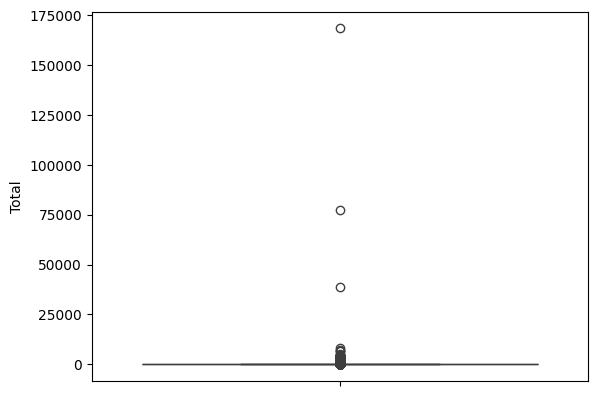

In [ ]:
sns.boxplot(veri["Total"])
plt.show()

Yukarıda gördüğümüz üzere aykırı gözlemler mevcut. Aykırı değerlerden kurtulmaya çalışalım. Öncelikle çeyrekliklerin sınırlarını belirleyelim.



In [ ]:
Q1=veri["Total"].quantile(0.25)
Q3=veri["Total"].quantile(0.75)
IQR=Q3-Q1

Verimiz için alt ve üst sınırları belirleyelim ki aykırı değerler tespit edilebilsin.

In [ ]:
altsınır=Q1-1.5*IQR
ustsınır=Q3+1.5*IQR

Şimdi sırada aykırı değerleri çıkarmak var.

In [ ]:
veri=veri[~((veri["Total"]>ustsınır)|(veri["Total"]<altsınır))]
print(veri.shape)

(366643, 9)


Şuan 366643 veri kaldı ve 9 sütunumuz var.

In [ ]:
print(veri)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Total  


Yukarıda görüldüğü gibi aykırı değerler verisetinden çıkarılmıştır. Ancak satır numaraları yani index numaraları aynı kalmıştır. Güncelde 366643 veri olmasına rağmen son index sayısı 541908 olarak kalmıştır. Şimdi bu indexleri yeniden numaralandıralım.

In [ ]:
veri=veri.reset_index(drop=True)

In [ ]:
print(veri)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
366638    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
366639    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
366640    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
366641    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
366642    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Total  


Verisetimizde her bir alışveriş ayrı bir satır olarak girilmiştir. Yani aynı kişi birden fazla alışveriş yaptığında her bir alışverişi bir satır olarak girilmiş. Dolayısıyla alışveriş yapan unique(benzersiz) kullanıcı sayısını bulalım.

In [ ]:
print(veri["CustomerID"].nunique())

4194


Benzersiz kullanıcı sayısı 4194'tür.

Şimdi de fatura adedine bakalım.

In [ ]:
print(veri["InvoiceNo"].nunique())

16806


Toplamda 16806 tane eşsiz fatura kesilmiş. Örneğin bir alışverişte müşteri 10 farklı ürün almış olsun. Verisetimize bu her ürün için ayrı bir satır olarak girilmiş. Yani 10 ürünlük tek bir alışveriş için aynı InvoiceNo'ya sahip 10 farklı satır yazılmış.

In [ ]:
print(veri)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
366638    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
366639    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
366640    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
366641    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
366642    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Total  


In [ ]:
print(type(veri["CustomerID"]))

<class 'pandas.core.series.Series'>


CustomerID değişkenine baktığımızda değerler ".0" ile bitmiş. Bu "0" ları kaldıralım.

In [ ]:
veri["CustomerID"]=veri["CustomerID"].astype(int)

In [ ]:
print(veri)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
366638    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
366639    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
366640    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
366641    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
366642    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Total  


Veri tipleri doğru bir şekilde oluşturulmuş mu bakalım.

In [ ]:
print(veri.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366643 entries, 0 to 366642
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    366643 non-null  object        
 1   StockCode    366643 non-null  object        
 2   Description  366643 non-null  object        
 3   Quantity     366643 non-null  int64         
 4   InvoiceDate  366643 non-null  datetime64[ns]
 5   UnitPrice    366643 non-null  float64       
 6   CustomerID   366643 non-null  int64         
 7   Country      366643 non-null  object        
 8   Total        366643 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 25.2+ MB
None


Veri tipleri analize uygun şekilde oluşturulmuş.

In [ ]:
bugün=veri["InvoiceDate"].max()
print(bugün)

2011-12-09 12:50:00


Verisetimiz statik bir veriseti olduğundan en ileri tarihi bugün olarak kabul edeceğiz. Eğer dinamik bir veriseti ile çalışsaydık; anlık tarihi veren bir kod yazarak analizimizi sürekli güncel tutmamız gerekirdi.
Burada en ileri tarih 2011-12-09 12:50:00'dır.

In [ ]:
import datetime as dt
bugün=dt.datetime(2011,12,9,12,50,0)
print(bugün)

2011-12-09 12:50:00


Şuana kadar verisetimizi RFM analizine uygun hale getirdik. Şimdi yapmamız gereken önce Recency(Bugün-Müşterinin Son Alışveriş Tarihi)(Gün cinsinden olmalı.) bulmak.

In [ ]:
r=(bugün-veri.groupby("CustomerID").agg({"InvoiceDate":"max"})).applymap(lambda x:x.days)
print(r)

            InvoiceDate
CustomerID             
12347                 1
12348                74
12349                18
12350               309
12352                35
...                 ...
18280               277
18281               180
18282                 7
18283                 3
18287                42

[4194 rows x 1 columns]


<ipython-input-32-acbb41faaff2>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r=(bugün-veri.groupby("CustomerID").agg({"InvoiceDate":"max"})).applymap(lambda x:x.days)


Yukarıdaki kod ile benzersiz CustomerID 'leri sıraladık ve bu Id'lere sahip kişilerin bugün ile son alışveriş yaptığı tarih arasındaki geçen gün sayısını yazdırdık.

Recency'den sonra sıra Frequency'e geldi. Her benzersiz müşterinin, benzersiz fatura sayılarını bulursak; alışveriş sıklık sayısını hesaplarız.

In [ ]:
f = veri.groupby(["CustomerID", "InvoiceNo"]).agg({"InvoiceNo": "count"})
print(f)

                      InvoiceNo
CustomerID InvoiceNo           
12347      537626            29
           542237            29
           549222            23
           556201            17
           562032            20
...                         ...
18283      579673            52
           580872            50
18287      554065            25
           570715            31
           573167             2

[16806 rows x 1 columns]


In [ ]:
f=f.groupby("CustomerID").agg({"InvoiceNo":"count"})
print(f)

            InvoiceNo
CustomerID           
12347               7
12348               4
12349               1
12350               1
12352               7
...               ...
18280               1
18281               1
18282               2
18283              16
18287               3

[4194 rows x 1 columns]


Son olarak Monetary(Müşteri bugüne kadar bize ne kadar para kazandırdı?) bulalım.

In [ ]:
m=veri.groupby("CustomerID").agg({"Total":"sum"})
print(m)

              Total
CustomerID         
12347       3174.62
12348        601.64
12349       1145.35
12350        334.40
12352       1505.74
...             ...
18280        180.60
18281         80.82
18282        178.05
18283       2094.88
18287       1068.74

[4194 rows x 1 columns]


Elimizde buradan itibaren RFM analizi için gerekli olan Recency, Frequency ve Monetary değişkenleri var. Bunları tek tablo ile göz önüne serelim. Yani RFM tablosunu oluşturalım.

In [ ]:
RFM=r.merge(f,on="CustomerID").merge(m,on="CustomerID")
RFM=RFM.reset_index()
RFM=RFM.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary","CustomerID":"Customer"})
print(RFM)

      Customer  Recency  Frequency  Monetary
0        12347        1          7   3174.62
1        12348       74          4    601.64
2        12349       18          1   1145.35
3        12350      309          1    334.40
4        12352       35          7   1505.74
...        ...      ...        ...       ...
4189     18280      277          1    180.60
4190     18281      180          1     80.82
4191     18282        7          2    178.05
4192     18283        3         16   2094.88
4193     18287       42          3   1068.74

[4194 rows x 4 columns]


K-MEANS Algoritması ile Kümeleme Analizi

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=RFM.iloc[:,1:]
print(df)

      Recency  Frequency  Monetary
0           1          7   3174.62
1          74          4    601.64
2          18          1   1145.35
3         309          1    334.40
4          35          7   1505.74
...       ...        ...       ...
4189      277          1    180.60
4190      180          1     80.82
4191        7          2    178.05
4192        3         16   2094.88
4193       42          3   1068.74

[4194 rows x 3 columns]


  Öncelikle normalizasyon işlemi yapalım.

In [ ]:
sc=MinMaxScaler()
dfnorm=sc.fit_transform(df)
dfnorm=pd.DataFrame(dfnorm,columns=df.columns)
print(dfnorm)

       Recency  Frequency  Monetary
0     0.002681      0.030  0.035451
1     0.198391      0.015  0.006701
2     0.048257      0.000  0.012777
3     0.828418      0.000  0.003715
4     0.093834      0.030  0.016804
...        ...        ...       ...
4189  0.742627      0.000  0.001997
4190  0.482574      0.000  0.000882
4191  0.018767      0.005  0.001968
4192  0.008043      0.075  0.023386
4193  0.112601      0.010  0.011921

[4194 rows x 3 columns]


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

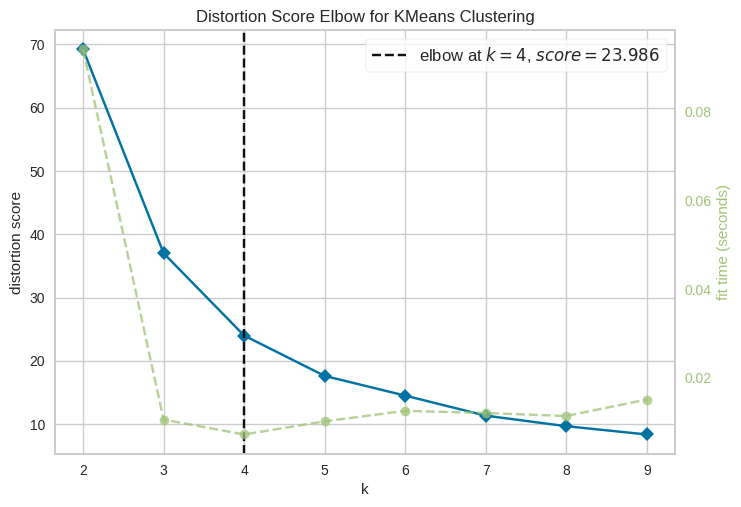

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmodel=KMeans(random_state=0)
grafik=KElbowVisualizer(kmodel,k=(2,10))
grafik.fit(dfnorm)
grafik.poof()

Yukarıdaki grafikte verisetimiz için optimal olarak 4 ayrı küme yapılması önerilmektedir.

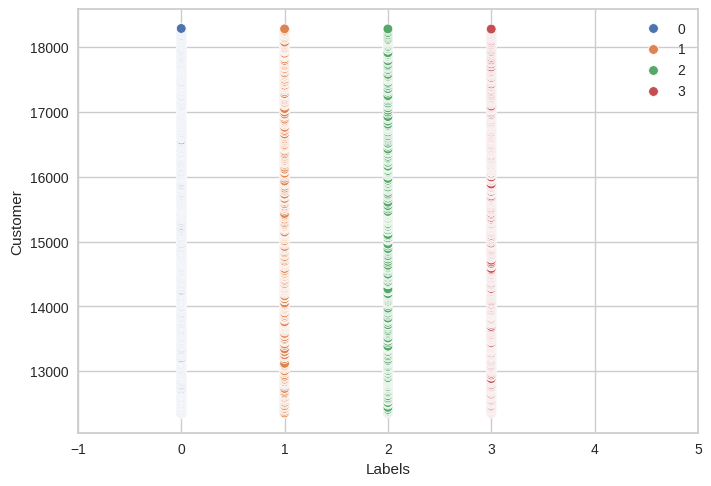

In [ ]:
kmodel=KMeans(random_state=0,n_clusters=4,init="k-means++")
kfit=kmodel.fit(dfnorm)
labels=kfit.labels_

RFM["Labels"]=labels

sns.scatterplot(x="Labels", y="Customer", data=RFM, hue=labels, palette="deep")
plt.xlim([-1,5])
plt.show()

In [ ]:
print(RFM.groupby("Labels")["Customer"].count())

Labels
0    2047
1     613
2     480
3    1054
Name: Customer, dtype: int64


In [ ]:
print(RFM.groupby("Labels").mean().iloc[:,1:])

           Recency  Frequency     Monetary
Labels                                    
0        18.258915   6.033708  1600.294378
1       189.349103   1.849918   414.972073
2       307.245833   1.327083   278.799083
3        78.835863   2.546490   694.622583


Bu gruplamalara göre müşteri gruplarına özel reklam kampanyaları vs. yapılabilir.